In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_csv('./final_dfs/df_final_without_labor.csv', converters={'ags2': str, 'ags5': str}) 
df = df.drop(['Unnamed:_0'], 1)
df

,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,number_of_students,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,"Flensburg, Stadt",01001,01,92,500,35,240,2901,240,11610,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,"Kiel, Landeshauptstadt",01002,01,92,460,37,268,2037,265,23898,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,"Lübeck, Hansestadt",01003,01,90,532,37,297,1927,294,20478,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,"Neumünster, Stadt",01004,01,85,588,37,316,1648,313,10380,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,Dithmarschen,01051,01,51,1864,35,448,3517,443,13158,...,2914,46945,23486,12.8,11806,11575,17816,9873,7834,7676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Saalfeld-Rudolstadt,16073,16,62,1423,37,341,2492,322,8772,...,2466,39242,20959,8.3,12237,13267,19810,5653,3271,2547
397,Saale-Holzland-Kreis,16074,16,54,1677,38,343,3419,340,7190,...,2288,42956,20631,7.6,5131,9216,14445,5254,3446,2379
398,Saale-Orla-Kreis,16075,16,54,1686,35,449,3172,444,7441,...,2253,40511,20610,7.6,7388,7994,17082,4532,2501,1632
399,Greiz,16076,16,55,1654,38,608,2779,563,8403,...,2233,40784,21275,7.8,11098,10354,18760,5324,3370,2287


In [54]:
df 

,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,number_of_students,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,"Flensburg, Stadt",01001,01,92,500,35,240,2901,240,11610,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,"Kiel, Landeshauptstadt",01002,01,92,460,37,268,2037,265,23898,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,"Lübeck, Hansestadt",01003,01,90,532,37,297,1927,294,20478,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,"Neumünster, Stadt",01004,01,85,588,37,316,1648,313,10380,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,Dithmarschen,01051,01,51,1864,35,448,3517,443,13158,...,2914,46945,23486,12.8,11806,11575,17816,9873,7834,7676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Saalfeld-Rudolstadt,16073,16,62,1423,37,341,2492,322,8772,...,2466,39242,20959,8.3,12237,13267,19810,5653,3271,2547
397,Saale-Holzland-Kreis,16074,16,54,1677,38,343,3419,340,7190,...,2288,42956,20631,7.6,5131,9216,14445,5254,3446,2379
398,Saale-Orla-Kreis,16075,16,54,1686,35,449,3172,444,7441,...,2253,40511,20610,7.6,7388,7994,17082,4532,2501,1632
399,Greiz,16076,16,55,1654,38,608,2779,563,8403,...,2233,40784,21275,7.8,11098,10354,18760,5324,3370,2287


### Scaling the data

In [55]:
X = df.drop(["ags2","ags5","kreis"], 1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
X = pd.DataFrame(scaled_data, columns = X.columns)

## PCA

In [56]:
pca = PCA(n_components=3)

In [57]:
pca.fit(X)

PCA(n_components=3)

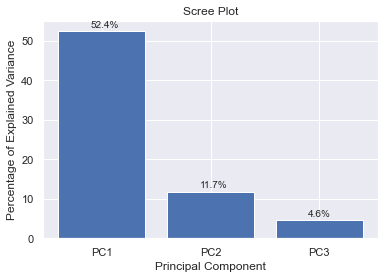

In [58]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
for index,data in enumerate(per_var):
    plt.text(x=index+0.9 , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.show()



In [59]:
principalComponents = pca.fit_transform(X)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2
0,-2.765898,-8.916926,-2.971051
1,3.007037,-9.501194,-2.351089
2,1.370044,-6.933627,-3.443304
3,-3.949465,-6.754150,-2.353724
4,-3.041719,2.903976,-2.170153
...,...,...,...
396,-4.036212,0.802000,-2.942964
397,-5.033526,0.958582,-1.558271
398,-5.366644,2.146124,-2.275229
399,-4.728067,1.963288,-3.086019


### Importance of each feature

In [60]:
pca_param = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])
pca_param = pca_param.T


In [61]:
pca_param['total'] = 0.71*pca_param['PC-1'] + 0.114*pca_param['PC-2'] + 0.047*pca_param['PC-3']
pca_param.sort_values(['PC-3'], ascending=[False]).head(20)

,PC-1,PC-2,PC-3,total
purchasing_power_per_person,0.004074,0.061538,0.291409,0.023604
purchasing_power_per_household,-0.002804,0.108128,0.288832,0.023911
municipal_tax_per_capita,0.024569,-0.045402,0.285510,0.025687
median_income,0.027279,-0.090644,0.258685,0.021193
activity_index,-0.009142,0.088102,0.254947,0.015535
_percentage_out_of_home,0.017483,-0.033278,0.233628,0.019600
kilometers_per_person_and_day,-0.017052,0.126406,0.200259,0.011715
proportion_of_foreigners_in_2018,0.036805,-0.132810,0.191011,0.019969
no_of_births_per_capita,0.037060,-0.100533,0.188233,0.023699
no_of_paths_per_person_and_day,0.006024,-0.028755,0.183050,0.009602


Text(0, 0.5, 'PCA 2')

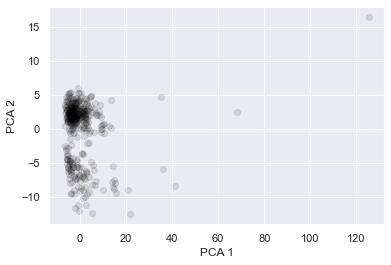

In [62]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

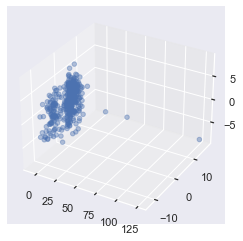

In [63]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(PCA_components[0], PCA_components[1], PCA_components[2],  alpha=.4, cmap='Greens');

## Clustering 

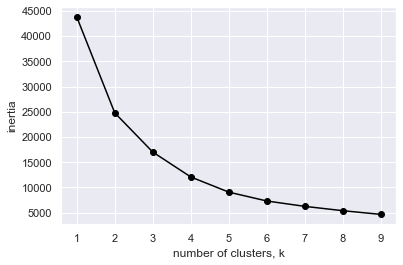

In [64]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [65]:
km = KMeans(n_clusters=3).fit(PCA_components)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_
df = cluster_map.merge(df, left_on='data_index', right_index=True)

In [66]:
df[df["kreis"]=="Kiel, Landeshauptstadt"]

,data_index,cluster,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
1,1,2,"Kiel, Landeshauptstadt",01002,01,92,460,37,268,2037,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841


In [67]:
PCA_components.iloc[[0,324]]

,0,1,2
0,-2.765898,-8.916926,-2.971051
324,125.422606,16.474704,-8.505161


,0,1,2
324,125.422606,16.474704,-8.505161


### Looking at the clusters

In [69]:
print(', '.join(df.loc[df['cluster'] == 0]['kreis'].to_numpy()))

Flensburg, Stadt, Neumünster, Stadt, Dithmarschen, Herzogtum Lauenburg, Nordfriesland, Ostholstein, Pinneberg, Plön, Rendsburg-Eckernförde, Schleswig-Flensburg, Segeberg, Steinburg, Stormarn, Salzgitter, Wolfsburg, Gifhorn, Goslar, Helmstedt, Northeim, Peine, Wolfenbüttel, Göttingen, Diepholz, Hameln-Pyrmont, Hildesheim, Holzminden, Nienburg/Weser, Schaumburg, Celle, Cuxhaven, Harburg, Lüchow-Dannenberg, Lüneburg, Osterholz, Rotenburg (Wümme), Heidekreis, Stade, Uelzen, Verden, Delmenhorst, Emden, Oldenburg, Stadt, Osnabrück, Stadt, Wilhelmshaven, Ammerland, Aurich, Cloppenburg, Emsland, Friesland, Grafschaft Bentheim, Leer, Oldenburg, Kreis, Osnabrück, Kreis, Vechta, Wesermarsch, Wittmund, Bremerhaven, Mülheim an der Ruhr, Remscheid, Solingen, Kleve, Viersen, Leverkusen, Düren, Euskirchen, Heinsberg, Oberbergischer Kreis, Rheinisch-Bergischer Kreis, Bottrop, Coesfeld, Warendorf, Herford, Höxter, Lippe, Minden-Lübbecke, Paderborn, Hagen, Hamm, Hochsauerlandkreis, Olpe, Siegen-Wittgenst

In [70]:
df[['cluster', 'ags5']].groupby(['cluster']).agg(['count'])


,ags5
,count
cluster,
0,332
1,2
2,67


In [71]:
df.loc[df['cluster'] == 1]['kreis'].to_numpy()

array(['Hamburg', 'Berlin'], dtype=object)

In [72]:
print(', '.join(df.loc[df['cluster'] == 2]['kreis'].to_numpy()))

Kiel, Landeshauptstadt, Lübeck, Hansestadt, Braunschweig, Hannover, Bremen, Düsseldorf, Duisburg, Essen, Krefeld, Mönchengladbach, Oberhausen, Wuppertal, Mettmann, Rhein-Kreis Neuss, Wesel, Bonn, Köln, Aachen, Rhein-Erft-Kreis, Rhein-Sieg-Kreis, Gelsenkirchen, Münster, Borken, Recklinghausen, Steinfurt, Bielefeld, Gütersloh, Bochum, Dortmund, Herne, Ennepe-Ruhr-Kreis, Märkischer Kreis, Unna, Kreisfreie Stadt Darmstadt, Kreisfreie Stadt Frankfurt am Main, Kreisfreie Stadt Offenbach am Main, Landeshauptstadt Wiesbaden, Groß-Gerau, Main-Kinzig, Offenbach, Kreisfreie Stadt Kassel, Stadt Ludwigshafen a. Rh., Stadt Mainz, Stuttgart, Böblingen, Esslingen, Ludwigsburg, Rems-Murr-Kreis, Karlsruhe, Stadt, Karlsruhe, Kreis, Heidelberg, Mannheim, Rhein-Neckar-Kreis, Freiburg im Breisgau, Ortenaukreis, München, Landeshauptstadt, Rosenheim, Stadt, München, Kreis, Regensburg, Stadt, Nürnberg, Augsburg, Stadt, Regionalverband Saarbrücken, Dresden, Leipzig, Stadt, Halle (Saale), Magdeburg, Erfurt


In [73]:
#df.to_csv('./corona_data_sets_modified/df_final_without_labor_with_clusters.csv', index = False)